# Import dependencies

In [357]:
# import pandas
import pandas as pd

# import sql alchemy
from sqlalchemy import create_engine

# import pymysql
import pymysql
pymysql.install_as_MySQLdb()

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [358]:
# import and establish Base for which classes will be constructed
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [359]:
# import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Float

# Get csv into dataframe

In [360]:
# store filepath in variable
tickets_311 = "311_Call_Center_Service_Requests_100.csv"

In [361]:
# get data into a dataframe
tickets_311_df = pd.read_csv(tickets_311, encoding="ISO-8859-1")

In [362]:
# test df
tickets_311_df.head()


,CASE ID,SOURCE,DEPARTMENT,WORK GROUP,REQUEST TYPE,CATEGORY,TYPE,DETAIL,CREATION DATE,CREATION TIME,CREATION MONTH,CREATION YEAR,STATUS,EXCEEDED EST TIMEFRAME,CLOSED DATE,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,STREET ADDRESS,ADDRESS WITH GEOCODE,ZIP CODE,NEIGHBORHOOD,COUNTY,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,LATITUDE,LONGITUDE,CASE URL,30-60-90 Days Open Window
0,2014123049,SYS,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,9/23/14,10:23 AM,9,2014,RESOL,Y,6/25/18,6.0,2018.0,"1,371",4717 NE 45TH TER,"4717 NE 45TH TER\n64117\n(39.175993, -94.523942)",64117,Winnwood,Clay,1,Shoal Creek,76031,39.175993,-94.523942,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
1,2016002855,PHONE,NHS,NHS-Dangerous Buildings-,Prop/Build/Construct-Dangerous Building-On list,Property / Buildings / Construction,Dangerous Building,Standard,1/11/16,8:42 AM,1,2016,RESOL,Y,2/9/18,2.0,2018.0,760,5435 E 28TH TER,"5435 E 28TH TER\n64128\n(39.072903, -94.518698)",64128,South Blue Valley,Jackson,3,East,21655,39.072903,-94.518698,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
2,2015094706,WEB,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,8/8/15,6:54 AM,8,2015,RESOL,Y,5/3/18,5.0,2018.0,999,7001 E 16TH TER,"7001 E 16TH TER\n64126\n(39.091047, -94.500874)",64126,East Blue Valley,Jackson,3,East,7330,39.091047,-94.500874,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
3,2010071747,PHONE,NHS,NHS-Solid Waste-,Trash Recycling Missed by Contractor,Trash,Recycle,Contractor,2/23/10,7:39 AM,2,2010,RESOL,N,2/23/10,2.0,2010.0,0,13001 E 59TH TER,"13001 E 59TH TER\n64133\n(39.013549, -94.428135)",64133,Blue Vue Hills,Jackson,5,East,64380,39.013549,-94.428135,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
4,2014080650,PHONE,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,6/24/14,12:11 PM,6,2014,RESOL,Y,6/27/18,6.0,2018.0,"1,464",3002 LISTER AVE,"3002 LISTER AVE\n64128\n(39.070634, -94.528934)",64128,Knoches Park,Jackson,3,East,22793,39.070634,-94.528934,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN


In [363]:
status = tickets_311_df["STATUS"]
print("Using Loc: " + status)

0     Using Loc: RESOL
1     Using Loc: RESOL
2     Using Loc: RESOL
3     Using Loc: RESOL
4     Using Loc: RESOL
5     Using Loc: RESOL
6     Using Loc: RESOL
7     Using Loc: RESOL
8     Using Loc: RESOL
9      Using Loc: OPEN
10    Using Loc: RESOL
11     Using Loc: OPEN
12    Using Loc: RESOL
13    Using Loc: RESOL
14    Using Loc: RESOL
15     Using Loc: OPEN
16    Using Loc: RESOL
17     Using Loc: OPEN
18     Using Loc: OPEN
19    Using Loc: RESOL
20    Using Loc: RESOL
21    Using Loc: RESOL
22    Using Loc: RESOL
23    Using Loc: RESOL
24     Using Loc: OPEN
25     Using Loc: OPEN
26    Using Loc: RESOL
27    Using Loc: RESOL
28    Using Loc: RESOL
29    Using Loc: RESOL
30    Using Loc: RESOL
31    Using Loc: RESOL
32    Using Loc: RESOL
33    Using Loc: RESOL
34    Using Loc: RESOL
35    Using Loc: RESOL
36    Using Loc: RESOL
37    Using Loc: RESOL
38    Using Loc: RESOL
39     Using Loc: OPEN
40     Using Loc: OPEN
41    Using Loc: RESOL
42    Using Loc: RESOL
43    Using

In [364]:
resolved_tix_df = tickets_311_df[tickets_311_df['STATUS'] == "RESOL"]

In [365]:
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [366]:
resolved_tix_df

,CASE ID,SOURCE,DEPARTMENT,WORK GROUP,REQUEST TYPE,CATEGORY,TYPE,DETAIL,CREATION DATE,CREATION TIME,CREATION MONTH,CREATION YEAR,STATUS,EXCEEDED EST TIMEFRAME,CLOSED DATE,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,STREET ADDRESS,ADDRESS WITH GEOCODE,ZIP CODE,NEIGHBORHOOD,COUNTY,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,LATITUDE,LONGITUDE,CASE URL,30-60-90 Days Open Window
0,2014123049,SYS,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,9/23/14,10:23 AM,9,2014,RESOL,Y,6/25/18,6.0,2018.0,"1,371",4717 NE 45TH TER,"4717 NE 45TH TER\n64117\n(39.175993, -94.523942)",64117,Winnwood,Clay,1,Shoal Creek,76031,39.175993,-94.523942,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
1,2016002855,PHONE,NHS,NHS-Dangerous Buildings-,Prop/Build/Construct-Dangerous Building-On list,Property / Buildings / Construction,Dangerous Building,Standard,1/11/16,8:42 AM,1,2016,RESOL,Y,2/9/18,2.0,2018.0,760,5435 E 28TH TER,"5435 E 28TH TER\n64128\n(39.072903, -94.518698)",64128,South Blue Valley,Jackson,3,East,21655,39.072903,-94.518698,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
2,2015094706,WEB,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,8/8/15,6:54 AM,8,2015,RESOL,Y,5/3/18,5.0,2018.0,999,7001 E 16TH TER,"7001 E 16TH TER\n64126\n(39.091047, -94.500874)",64126,East Blue Valley,Jackson,3,East,7330,39.091047,-94.500874,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
3,2010071747,PHONE,NHS,NHS-Solid Waste-,Trash Recycling Missed by Contractor,Trash,Recycle,Contractor,2/23/10,7:39 AM,2,2010,RESOL,N,2/23/10,2.0,2010.0,0,13001 E 59TH TER,"13001 E 59TH TER\n64133\n(39.013549, -94.428135)",64133,Blue Vue Hills,Jackson,5,East,64380,39.013549,-94.428135,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
4,2014080650,PHONE,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Main Structure,6/24/14,12:11 PM,6,2014,RESOL,Y,6/27/18,6.0,2018.0,"1,464",3002 LISTER AVE,"3002 LISTER AVE\n64128\n(39.070634, -94.528934)",64128,Knoches Park,Jackson,3,East,22793,39.070634,-94.528934,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
5,2017017888,PHONE,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildings / Construction,Property Maintenance,Other Property Issue,2/16/17,7:30 AM,2,2017,RESOL,Y,6/7/18,6.0,2018.0,476,2508 E 69TH ST,"2508 E 69TH ST\n64132\n(39.001971, -94.557283)",64132,Blenheim Square Research Hospital,Jackson,5,Metro,113882,39.001971,-94.557283,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
6,2016123146,PHONE,City Planning and Development,City Planning and Development-Dev Comp-Zoning,Prop/Build/Construct - Land Use / Zoning - Mis...,Property / Buildings / Construction,Land Use / Zoning Issue,Miscellaneous Zoning,10/3/16,4:10 PM,10,2016,RESOL,N,7/25/18,7.0,2018.0,660,7230 WORNALL RD,"7230 WORNALL RD\n64114\n(38.9965, -94.594358)",64114,Ward Parkway,Jackson,6,Metro,110649,38.996500,-94.594358,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
7,2016133215,WEB,NHS,NHS-Neighborhood Preservation-,Property Violations,Vehicles / Parking,Disabled/Unlicensed on Private Property,Other Private Property,10/25/16,9:04 PM,10,2016,RESOL,Y,5/3/18,5.0,2018.0,555,1600 BRISTOL AVE,"1600 BRISTOL AVE\n64126\n(39.092275, -94.500291)",64126,East Blue Valley,Jackson,3,East,7290,39.092275,-94.500291,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
8,2017009064,EMAIL,NHS,NHS-Neighborhood Preservation-,Property Violations,Vehicles / Parking,Parked on Unapproved Surface,Car Private Property,1/24/17,1:20 PM,1,2017,RESOL,Y,5/3/18,5.0,2018.0,464,12206 E 59TH ST,"12206 E 59TH ST\n64133\n(39.014959, -94.437536)",64133,Fairway Hills,Jackson,5,East,63692,39.014959,-94.437536,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN
10,2017058002,PHONE,NHS,NHS-Neighborhood Preservation-,Property Violations,Property / Buildin

In [367]:
reduced_df = resolved_tix_df[["LATITUDE","LONGITUDE","DAYS TO CLOSE","CREATION DATE"]].reset_index(drop=True)
reduced_df

,LATITUDE,LONGITUDE,DAYS TO CLOSE,CREATION DATE
0,39.175993,-94.523942,"1,371",9/23/14
1,39.072903,-94.518698,760,1/11/16
2,39.091047,-94.500874,999,8/8/15
3,39.013549,-94.428135,0,2/23/10
4,39.070634,-94.528934,"1,464",6/24/14
5,39.001971,-94.557283,476,2/16/17
6,38.996500,-94.594358,660,10/3/16
7,39.092275,-94.500291,555,10/25/16
8,39.014959,-94.437536,464,1/24/17
9,39.092613,-94.527612,350,5/18/17


In [368]:
print(len(reduced_df["LATITUDE"].values))
print(len(reduced_df["LONGITUDE"].values))
long_array = []
print(type(long_array))
i = 0

for x in reduced_df["LATITUDE"].values:
#     long_array[i] = [reduced_df["LATITUDE"][i], reduced_df["LONGITUDE"][i]]

    long_array.append([reduced_df["LATITUDE"][i], reduced_df["LONGITUDE"][i]])
    i += 1
long_array

78
78
<class 'list'>


[[39.175993, -94.523942],
 [39.072903000000004, -94.518698],
 [39.091046999999996, -94.500874],
 [39.013549, -94.428135],
 [39.070634000000005, -94.52893399999999],
 [39.001971000000005, -94.557283],
 [38.9965, -94.594358],
 [39.092275, -94.500291],
 [39.014959000000005, -94.437536],
 [39.092613, -94.527612],
 [38.917353999999996, -94.496792],
 [38.927238, -94.48646],
 [38.922838, -94.495769],
 [38.954234, -94.599078],
 [39.107766999999996, -94.544966],
 [39.035083, -94.450299],
 [39.194728000000005, -94.48038100000001],
 [39.114740999999995, -94.50961600000001],
 [39.108222999999995, -94.552227],
 [39.002237, -94.564278],
 [39.040191, -94.597078],
 [39.10928, -94.539202],
 [39.30339, -94.56496700000001],
 [39.061060999999995, -94.511352],
 [39.048836, -94.53176500000001],
 [39.034053, -94.414295],
 [38.952635, -94.522301],
 [38.982943, -94.57650799999999],
 [39.054225, -94.56721800000001],
 [38.914109, -94.521956],
 [38.948704, -94.523015],
 [39.188978000000006, -94.623784],
 [39.0806

In [369]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [370]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")
# print(f"{long_array[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


In [371]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [372]:
reduced_df

,LATITUDE,LONGITUDE,DAYS TO CLOSE,CREATION DATE
0,39.175993,-94.523942,"1,371",9/23/14
1,39.072903,-94.518698,760,1/11/16
2,39.091047,-94.500874,999,8/8/15
3,39.013549,-94.428135,0,2/23/10
4,39.070634,-94.528934,"1,464",6/24/14
5,39.001971,-94.557283,476,2/16/17
6,38.996500,-94.594358,660,10/3/16
7,39.092275,-94.500291,555,10/25/16
8,39.014959,-94.437536,464,1/24/17
9,39.092613,-94.527612,350,5/18/17


In [373]:
df = pd.DataFrame()
final_df = pd.DataFrame()
df["DAYS TO CLOSE"] = reduced_df["DAYS TO CLOSE"].replace(',','', regex=True).astype(int)
bins = [-1, 15, 31, 90, 365, 9999999999]
df['binned'] = pd.cut(df['DAYS TO CLOSE'], bins, labels=[1,2,3,4,5])
full_df = reduced_df
full_df["DAYS TO CLOSE"] = df["DAYS TO CLOSE"]
full_df["BINNED"]= df["binned"]
full_df

,LATITUDE,LONGITUDE,DAYS TO CLOSE,CREATION DATE,BINNED
0,39.175993,-94.523942,1371,9/23/14,5
1,39.072903,-94.518698,760,1/11/16,5
2,39.091047,-94.500874,999,8/8/15,5
3,39.013549,-94.428135,0,2/23/10,1
4,39.070634,-94.528934,1464,6/24/14,5
5,39.001971,-94.557283,476,2/16/17,5
6,38.996500,-94.594358,660,10/3/16,5
7,39.092275,-94.500291,555,10/25/16,5
8,39.014959,-94.437536,464,1/24/17,5
9,39.092613,-94.527612,350,5/18/17,4


In [374]:
target = full_df["BINNED"]
target_names = ["Good","OK","Not Good","Bad", "Shameful"]

In [375]:
data = full_df.drop(["BINNED","CREATION DATE"], axis=1)
feature_names = data.columns
data.head()

,LATITUDE,LONGITUDE,DAYS TO CLOSE
0,39.175993,-94.523942,1371
1,39.072903,-94.518698,760
2,39.091047,-94.500874,999
3,39.013549,-94.428135,0
4,39.070634,-94.528934,1464


In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 0.983/0.950
k: 5, Train/Test Score: 0.966/0.950
k: 7, Train/Test Score: 0.931/0.950
k: 9, Train/Test Score: 0.931/0.950
k: 11, Train/Test Score: 0.914/0.900
k: 13, Train/Test Score: 0.793/0.700
k: 15, Train/Test Score: 0.759/0.600
k: 17, Train/Test Score: 0.759/0.600
k: 19, Train/Test Score: 0.690/0.550


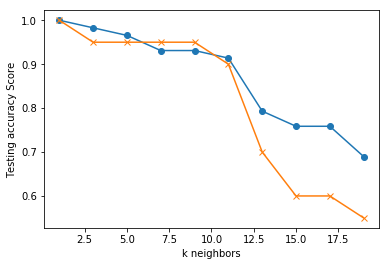

In [377]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [378]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.950
